> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (FBI Gun Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [302]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt

df = pd.read_excel("./gun_data.xlsx")
df.to_csv("./gun_data.csv", sep=",")
df_gun = pd.read_csv('gun_data.csv')
df_census = pd.read_csv('U.S. Census Data.csv')
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [303]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_gun.head()

,Unnamed: 0,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [304]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
Unnamed: 0                   12485 non-null int64
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [305]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Check whether duplicated rows exist
sum(df_gun.duplicated())

0

In [306]:
# Check Null columns and then Fill Nan values with 0.
# And add df_gun DataFrame name with '_01'
df_gun_01 = df_gun.fillna(0)
df_gun_01.isnull().sum()

Unnamed: 0                   0
month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [307]:
# remove Unname columns which has no necesarry
del df_gun_01['Unnamed: 0']
list(df_gun_01)

['month',
 'state',
 'permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals']

In [308]:
# Turn float64 values into int64
# i want to figure out how to do this with 'for i' prase instead of typing all of them....
df_gun_01 = df_gun_01.astype({'permit' : int
                  , 'permit_recheck' : int
                  , 'handgun' : int
                  , 'long_gun' : int
                  , 'other' : int
                  , 'admin' : int
                  , 'prepawn_handgun' : int
                  , 'prepawn_long_gun' : int
                  , 'prepawn_other' : int
                  , 'redemption_handgun' : int
                  , 'redemption_long_gun' : int
                  , 'redemption_other' : int
                  , 'returned_handgun' : int
                  , 'returned_long_gun' : int
                  , 'returned_other' : int
                  , 'rentals_handgun' : int
                  , 'rentals_long_gun' : int
                  , 'private_sale_handgun' : int
                  , 'private_sale_long_gun' : int
                  , 'private_sale_other' : int
                  , 'return_to_seller_handgun' : int
                  , 'return_to_seller_long_gun' : int
                  , 'return_to_seller_other' : int
                 })
df_gun_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12485 non-null int64
permit_recheck               12485 non-null int64
handgun                      12485 non-null int64
long_gun                     12485 non-null int64
other                        12485 non-null int64
multiple                     12485 non-null int64
admin                        12485 non-null int64
prepawn_handgun              12485 non-null int64
prepawn_long_gun             12485 non-null int64
prepawn_other                12485 non-null int64
redemption_handgun           12485 non-null int64
redemption_long_gun          12485 non-null int64
redemption_other             12485 non-null int64
returned_handgun             12485 non-null int64
returned_long_gun            12485 non-null int64
returned_other               12485 non-

In [309]:
# Suming up gun checks in order of Each transaction types
df_gun_01['permit_total'] = df_gun_01.loc[:, ['permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin']].sum(axis=1)
df_gun_01['prepawn_total'] = df_gun_01.loc[:, ['prepawn_handgun', 'prepawn_long_gun', 'prepawn_other']].sum(axis=1)
df_gun_01['redemption_total'] = df_gun_01.loc[:, ['redemption_handgun', 'redemption_long_gun', 'redemption_other']].sum(axis=1)
df_gun_01['returned_total'] = df_gun_01.loc[:, ['returned_handgun', 'returned_long_gun', 'returned_other']].sum(axis=1)
df_gun_01['rentals_total'] = df_gun_01.loc[:, ['rentals_handgun', 'rentals_long_gun']].sum(axis=1)
df_gun_01['private_sale_total'] = df_gun_01.loc[:, ['private_sale_handgun', 'private_sale_long_gun', 'private_sale_other']].sum(axis=1)
df_gun_01['return_to_seller_total'] = df_gun_01.loc[:, ['return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other']].sum(axis=1)

# Suming up gun checks in order of Each firearms types
df_gun_01['handgun_total'] = df_gun_01.loc[:, ['handgun', 'prepawn_handgun', 'redemption_handgun', 'returned_handgun', 'rentals_handgun', 'private_sale_handgun', 'return_to_seller_handgun']].sum(axis=1)
df_gun_01['long_gun_total'] = df_gun_01.loc[:, ['long_gun', 'prepawn_long_gun', 'redemption_long_gun', 'returned_long_gun', 'rentals_long_gun', 'private_sale_long_gun', 'return_to_seller_long_gun']].sum(axis=1)
df_gun_01['other_total'] = df_gun_01.loc[:, ['other', 'prepawn_other', 'redemption_other', 'returned_other', 'private_sale_other', 'return_to_seller_other']].sum(axis=1)

df_gun_02 = df_gun_01

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Q1. What census data is most associated with high gun per capita?)
 - 

#### 1) Get State which got the highest gun per capita
 -> 'Kentucky' state was the highest - 8.18 (2016)

In [310]:
# In order to merge 'Census_data.csv' with 'gun_data.csv', we need some additional Cleansing

# Gun data cleansing...
df_gun_02_201607 = df_gun_02[df_gun_02['month'] == '2016-07']
df_gun_02_201607 = df_gun_02_201607.pivot_table(values = 'totals', index='state', columns='month', fill_value =0)

df_gun_02_201607 = pd.DataFrame(data=df_gun_02_201607)
df_gun_02_201607 = df_gun_02_201607.rename(columns={'2016-07' : 'total_gun_regi'})
df_gun_02_201607.astype({'total_gun_regi' : int})
df_gun_02_201607.head()

month,total_gun_regi
state,
Alabama,48927
Alaska,6793
Arizona,34496
Arkansas,19378
California,190218


In [311]:
# Census data cleansing...
# In order to get 'gun per capita', i choose 'Population estimates, July 1, 2016,  (V2016)'
# Because it is much more recent and accurate than the others.
df_census_popul2016 = df_census.iloc[0]
df_census_popul2016 = pd.DataFrame(data=df_census_popul2016)
df_census_popul2016 = df_census_popul2016.rename(columns={0 : 'population'})
df_census_popul2016 = df_census_popul2016.drop(['Fact', 'Fact Note'])
df_census_popul2016 = df_census_popul2016.population.str.replace(',', '')
df_census_popul2016 = pd.DataFrame(data=df_census_popul2016)
df_census_popul2016 = df_census_popul2016.astype({'population' : int })


In [312]:
df_merged_201607 = pd.merge(df_census_popul2016, df_gun_02_201607, left_index=True, right_index=True)
df_merged_201607['gun per 100 population(2016)'] = round(df_merged_201607['total_gun_regi'] / df_merged_201607['population'], 4) * 100
print(df_merged_201607['gun per 100 population(2016)'].idxmax(), df_merged_201607['gun per 100 population(2016)'].max())


Kentucky 8.18


 * According to the Table above, 'Alabama' 'Illinois' 'Indiana' 'Kentucky' state recorded at least 1 gun per capita(100 population)
 
 * And the 'Kentucky' state got the over 8 guns per capita(100 population)

#### 2) Which Census data is most associated with the Kentucky?
- I can't handle this data anymore... i need more study to doing data cleansing for statistical analysis...
- I need an know-how about replacing all values in every columns
- I did 'for in' function to do it, but it was hard to accomplish...

### Research Question 2  (Q2. Which states have had the highest growth in gun registrations?)
 - 'Mariana Islands' got the highest growth in gun regislation on 2016(v2011) in terms of 'CAGR'
 - But, in terms of the number of gun regislation increase, 'Kentucky' got the highest amount of growth in gun regislation.


In [313]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

dfg_month_total = dfg_02
dfg_month_total['year'] = dfg_month_total['month'].str[0:4]
pivot_dfg = dfg_month_total.pivot_table(values = 'totals', index='state', columns='year', aggfunc="mean", fill_value =1)
pivot_dfg['CAGR'] = round(pivot_dfg.iloc[:, -2].div(pivot_dfg.iloc[:, -7]).pow(1./(len(pivot_dfg.columns) - 1)).sub(1) * 100, 1)
pivot_dfg['amt_increase'] = round(pivot_dfg.iloc[:, -2].sub(pivot_dfg.iloc[:,-7]), 0)

print(pivot_dfg.head())
print( "In terms of CAGR from 2011 to 2016, Mariana Islands got the highest growth rate")
print(pivot_dfg['CAGR'].idxmax(), " : ", round(pivot_dfg['CAGR'].max(), 1), "%")
print( "In terms of amount of increases from 2011 to 2016, Kentucky got the highest growth")
print(pivot_dfg['amt_increase'].idxmax(), " : ", round(pivot_dfg['amt_increase'].max(), 0))



year           1998          1999          2000          2001          2002  \
state                                                                         
Alabama     18284.0  20563.000000  18492.583333  19182.250000  18417.333333   
Alaska       1992.5   3589.416667   3329.916667   3329.916667   3066.083333   
Arizona      8726.5  14462.333333  12355.250000  12298.500000  11855.000000   
Arkansas    10876.0  15384.666667  14135.666667  13838.500000  12785.333333   
California  33722.5  73595.333333  66208.833333  71214.083333  57032.500000   

year                2003          2004          2005          2006  \
state                                                                
Alabama     18789.916667  19166.416667  19656.083333  20264.666667   
Alaska       3088.250000   3375.333333   3709.500000   3919.750000   
Arizona     12143.250000  12976.583333  14720.750000  17014.833333   
Arkansas    12520.750000  13197.166667  13666.750000  14177.416667   
California  43702.583333  

### Research Question 3(Q3. What is the overall trend of gun purchases?)
 - According to the NICS notes, These regislation statistics do not represent the number of firearms sold. Based on varying state laws and purchase scenarios, a one-to-one correlation cannot be made between a firearm background check and a firearm sale.
 - But, If we regard these statistics as a purchases,
   - (1) In order of Transaction types, permit and permit_rechecked regislations initiated by official FFL are dominant through all the years
   - (2) In order of Firearms types, long_gun was common gun type during the whole year, but the handgun become dominant since june, 2013. And 'Other' was soared temporarily on the june, 2016.  

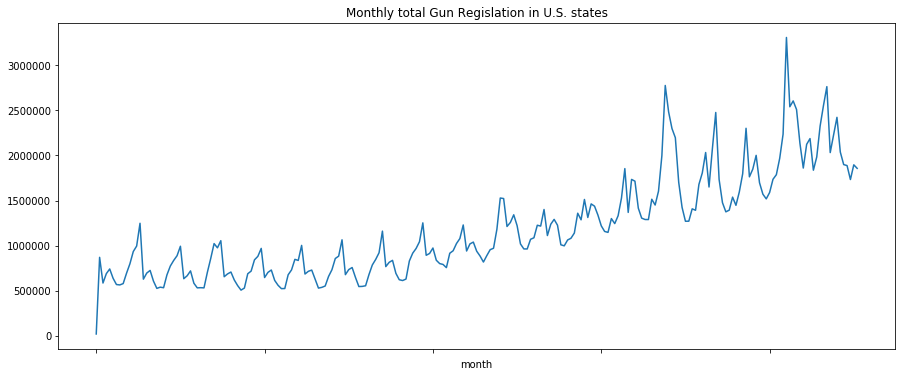

* Monthly total firearm regislation grows gradually


In [314]:
# plot 1. monthly total regislation
dfg_month = dfg_02.groupby(['month'])['totals'].sum()
dfg_month.plot(figsize = (15,6), title = 'Monthly total Gun Regislation in U.S. states')

plt.show()
print("* Monthly total firearm regislation grows gradually")

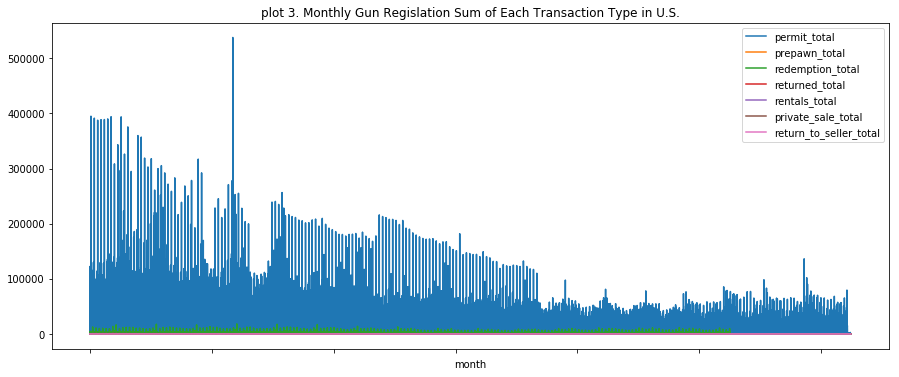

*permit and permit_rechecked regislations initiated by official FFL are dominant through all the years


In [315]:
# plot3. monthly Sum of Each Transaction Type
ax = dfg_02.plot(figsize = (15, 6), x="month", y="permit_total", title = "plot 3. Monthly Gun Regislation Sum of Each Transaction Type in U.S.")
dfg_02.plot(figsize = (15, 6), x="month", y="prepawn_total", ax=ax)
dfg_02.plot(figsize = (15, 6), x="month", y="redemption_total", ax=ax)
dfg_02.plot(figsize = (15, 6), x="month", y="returned_total", ax=ax)
dfg_02.plot(figsize = (15, 6), x="month", y="rentals_total", ax=ax)
dfg_02.plot(figsize = (15, 6), x="month", y="private_sale_total", ax=ax)
dfg_02.plot(figsize = (15, 6), x="month", y="return_to_seller_total", ax=ax)
plt.show()

print("*permit and permit_rechecked regislations initiated by official FFL are dominant through all the years")

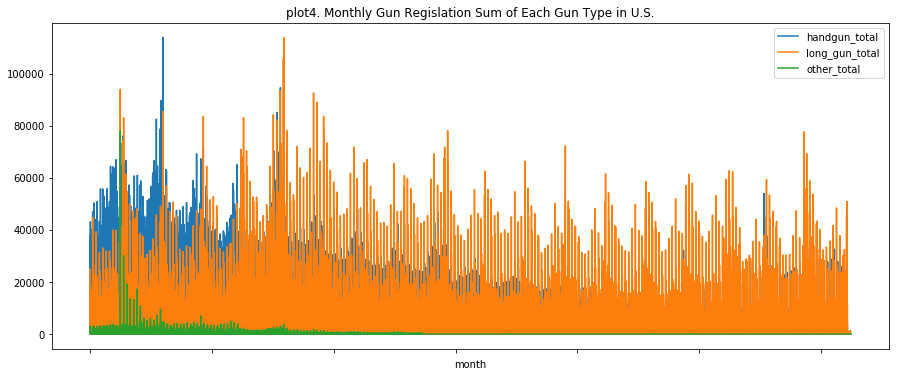

* long_gun was common gun type during the whole year, but the handgun become dominant since june, 2013. And "Other" was soared temporarily on the june, 2016. 
* Perimit and Permit_recheck background checks are not included


In [316]:
# plot4. monthly Sum of Each Gun Type
ax = dfg_02.plot(figsize = (15, 6), x="month", y="handgun_total", title = "plot4. Monthly Gun Regislation Sum of Each Gun Type in U.S.")
dfg_02.plot(figsize = (15, 6), x="month", y="long_gun_total", ax=ax)
dfg_02.plot(figsize = (15, 6), x="month", y="other_total", ax=ax)

plt.show()
print('* long_gun was common gun type during the whole year, but the handgun become dominant since june, 2013. And "Other" was soared temporarily on the june, 2016. ')

print('* Perimit and Permit_recheck background checks are not included')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

My conclustion
1. "Kentucky" got the highest gun per capita in 2016 with 16.1% growth rate
2. And "Kentucky" was the highest growth in gun regislation from 2011 to 2016 with 8.18 guns per capita(100 population)
3. And the overall trend in gun regislation, "Permitted by the official FFL" was the dominant from all the year
4. And in order of Firearms types, long_gun was common gun type during the whole year, but the handgun become dominant since june, 2013. And 'Other' was soared temporarily on the june, 2016.  



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [317]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0